In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [55]:
df = pd.read_csv('diabetic_data.csv')

In [56]:
remove = ['encounter_id','patient_nbr','weight','payer_code','medical_specialty']
df = df.drop(remove,1)

In [57]:
print(df.isnull().any().describe())

count        45
unique        1
top       False
freq         45
dtype: object


In [58]:
df['diag_1'] = df['diag_1'].str.replace('?','')
df['diag_2'] = df['diag_2'].str.replace('?','')
df['diag_3'] = df['diag_3'].str.replace('?','')
df['race'] = df['race'].str.replace('?','')

In [59]:
df['age'] = df['age'].str.replace('[','')
df['age'] = df['age'].str.replace(')','')

In [60]:
df['Age'] = pd.Series(df.age.str.extract(
    '([0-9]{2})', expand=False))[:-1]

In [61]:
df['A1Cresult'] = df['A1Cresult'].str.replace('>','')
df['max_glu_serum'] = df['max_glu_serum'].str.replace('>','')

In [62]:
df['diag_1'] = df['diag_1'].str.replace('V','')
df['diag_2'] = df['diag_2'].str.replace('V','')
df['diag_3'] = df['diag_3'].str.replace('V','')
df['diag_1'] = df['diag_1'].str.replace('E','')
df['diag_2'] = df['diag_2'].str.replace('E','')
df['diag_3'] = df['diag_3'].str.replace('E','')

In [63]:
df['diag_1'] = pd.to_numeric(df['diag_1'])
df['diag_2'] = pd.to_numeric(df['diag_2'])
df['diag_3'] = pd.to_numeric(df['diag_3'])

In [64]:
#Replace null values with mean
df['diag_1'].fillna((df['diag_1'].mean()), inplace=True)
df['diag_2'].fillna((df['diag_2'].mean()), inplace=True)
df['diag_3'].fillna((df['diag_3'].mean()), inplace=True)

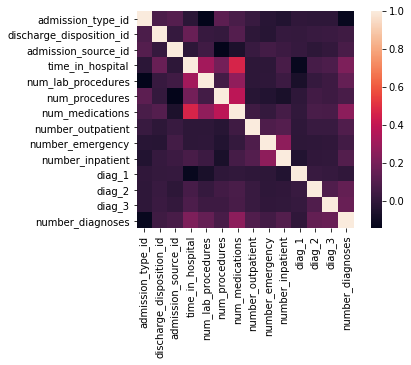

In [65]:
#Creating a correlation matrix.
corrmat = df.corr()
#Find correlation between the different variables.
f, ax = plt.subplots()
sns.heatmap(corrmat,square=True)

In [66]:
#Get dummies
df['gender'] = np.where(df['gender']=='Female', 1, 0)
df['readmitted'] = np.where(df['readmitted']=='>30', 1, 0)

#races = pd.get_dummies(df.race)

# Final column drops and NA drop.
#X = df.drop(['diabetesMed','age'], 1)
X = df.drop(['number_diagnoses','age'], 1)

#Concat with other variables
X = pd.get_dummies(X, sparse=True)
#X = pd.concat([X, races], axis=1)

#Y = df.diabetesMed
Y = df.number_diagnoses

In [67]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split
#Divide into training and test sets.
X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y,
    test_size=0.4,
    random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [68]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(61059, 113) (61059,)
(40707, 113) (40707,)


In [49]:
from sklearn.neural_network import MLPClassifier #Multi Layer Perceptron

#Establish and fit the model, with the same number of neurons in each perceptron layer.
mlp = MLPClassifier(hidden_layer_sizes=(500,), batch_size=100)
mlp.fit(X_train, Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size=100, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(500,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [50]:
mlp.score(X_test,Y_test)

0.50713636475299084

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(mlp, X, Y, cv=10)

In [33]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
rfc = ensemble.RandomForestClassifier()
rfc.fit(X_train, Y_train)

print('Accuracy of Random Forest Classifier: {:.5f}'.format(rfc.score(X_test, Y_test)))

cvScores = cross_val_score(rfc, X, Y, cv=10) 
print(cvScores)
print ('\nMean cross validation score is: ' + str(np.mean(cvScores)))


Accuracy of Random Forest Classifier: 0.48530


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


[ 0.43303221  0.41416225  0.47151837  0.50368406  0.51454117  0.51365959
  0.4865343   0.4735031   0.46730902  0.47221949]

Mean cross validation score is: 0.475016354066


In [69]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble

param_grid = {'n_estimators': 100,
         'max_depth':3,
         'loss': 'deviance',
         'subsample': 0.8,
         'max_features': 'auto',
         'learning_rate':0.05,
         'min_samples_leaf':3}

clf = ensemble.GradientBoostingClassifier(**param_grid, random_state=0)
clf.fit(X_train, Y_train)

print('Accuracy of Gradient Boosting Classifier on Test: {:.5f}'.format(clf.score(X_test, Y_test)))

Accuracy of Gradient Boosting Classifier on Test: 0.54492


In [ ]:
clf_scores = cross_val_score(clf, X, Y, cv=10)
print(clf_scores)
print ('\nMean cross validation score is: ' + str(np.mean(clf_scores)))

Using binary target variable(DiabetesMed), able to achieve 0.99995 accuracy with MLP classifier.
MLP Classifier takes a longer time to run, but with higher accuracy vs Random Forest or Boosted Classifier.
Random Forest and Boosted Classifier work extremely well with binary classification.

Assuming target variable is a range(number of diagnoses), accuracy was 0.507 with MLP classifier.
Boosted Classifier achieved the best mean cross validation score at 0.545, vs RF @ 0.485.